## <font color = red> Please fill up the asked information!
    
<font color = teal>Name: Aleksi Pikkarainen

<font color = teal>Student number: ******

<font color = teal>Mail: akpikk@utu.fi

------

# Data Analysis and Knowledge Discovery: Exercise 2, Supervised learning

The previous exercise was about <i>data understanding</i> and <i>data preparation</i>, which formed the basis for the modeling phase of the data mining process. Many modeling techniques make assumptions about the data, so the exploration and preparation phases can't be ignored. Now, as we have checked the validity of data and familiarized ourselves with it, we can move on to the next stage of the Cross-Industry Standard Process for Data Mining (CRISP-DM), which is <font color = green>modeling</font>.

The questions to be answered at this stage could include:

- What kind of model architecture best fits our data?
- How well does the model perform technically?
- Could we improve its performance?
- How do we evaluate the model's performance?

<i>Machine learning</i> is a subfield of artificial intelligence that provides automatic, objective and data-driven techniques for modeling the data. Its two main branches are <i>supervised learning</i> and <i>unsupervised learning</i>, and in this exercise, we are going to use the former, <font color = green>supervised learning</font>, for classification and regression tasks.

For classification, data remains the same as in the previous exercise, but I've already cleaned it up for you. Some data pre-processing steps are still required to ensure that it's in an appropriate format so that models can learn from it. Even though we are not conducting any major data exploration nor data preparation this time, <i>you should <b>never</b> forget it in your future data analyses</i>.

-----

<b>General guidance for exercises</b>

- Answer <b>all</b> questions below, even if you can't get your script to fully work.
- Write clear and easily readable code, and include explanations what your code does.
- Make informative illustrations: include labels for x and y axes, legends and captions for your plots.
- You can add more code and markup cells, as long as the flow of the notebook stays readable and logical.
- <b>A complete submission includes a working notebook</b>, so it's highly recommended to run "Restart & Run all" before the final save. Remember to submit BOTH versions of the exercise (ipynb AND html/pdf). 
- Grading: *Fail*/*Pass*/*Pass with honors* (+1)
    - Passing requires that <b>the parts 1-5</b> are completed.
    - +1 bonus point (grading *Pass with honors*) requires a <b>completely</b> correct solution and also thorough analysis.
- If you encounter problems, Google first. Always give the credit where it belongs so please <b>cite your sources, whether you're referencing text or code</b>. You will learn so much more when you have to research and summarize information in your own words. If you can't find an answer to the problem, don't hesitate to ask in the Moodle discussion or directly via email (tuhlei@utu.fi).
- Note! Don't leave it to the last moment! No feedback service during weekends.
- <b>We do not encourage the use of ChatGPT or similar models</b>, but if you choose to do so, always be critical of the outputs and try to comprehend them before any use. Also, make a brief description how you utilized the model (what was your input and how did you benefit from the output).


<font color = green> The guided exercise session is held on the 28th of November at 14:15-16:00, at TSE Elovena-Sali.</font>

<font color = red size = 4><b>The deadline is the 30th of November at 23:59</b></font>. Late submissions will not be accepted unless there is a valid excuse for an extension which should be asked **before** the original deadline.


------

### Gather all packages needed for this notebook here:

You can use other packages as well, but this excercise can be completed with those below.

In [1]:
import numpy as np
import pandas as pd

# Visualization packages - matplotlib and seaborn
# Remember that pandas is also handy and capable when it comes to plotting!
import seaborn as sns
import matplotlib.pyplot as plt

# Machine learning package - scikit-learn
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, LeaveOneOut, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import Ridge, LinearRegression

# Show the plots inline in the notebook
%matplotlib inline

______________
## <font color = lightcoral>1. Classification using k-nearest neighbors </font> 

We start exploring the world of data modeling by using the <font color = lightcoral>K-Nearest Neightbors (k-NN) algorithm</font>. The k-NN algorithm is one of the classic supervised machine learning algorithms which assumes that similar points are close to each other. 

In our case, we'll use the k-NN algorithm to *predict the presence of cardiovascular disease* (CVD) using all the other variables as <font color = lightcoral>features</font> in the given data set. I.e. the <font color = lightcoral>target variable</font> that we are interested in is `cardio`.

But first, we need data for the task. The code for loading the data into the environment is provided for you. The code should work but make sure that you have the CSV file of the data in the same directory where you have this notebook file.

**Exercise 1 A)**

Take a random sample of 1500 rows from the dataframe using your student id as a seed. Print the first 15 rows to check that everything is ok with the dataframe.

*Note: as mentioned, the data remains the same, but cholesterol has been one-hot-encoded for you already. There's also a new variable, gluc (about glucose levels), which is one-hot-encoded for you. It has similar values as cholesterol originally had [normal, at risk, elevated].*


In [2]:
### Loading code provided
# ------------------------------------------------------
# The data file should be at the same location than the 
# exercise file to make sure the following lines work!
# Otherwise, fix the path.
# ------------------------------------------------------

# Path for the data
data_path = 'ex2_cardio_data.csv'

# Read the CSV file 
cardio_data = pd.read_csv(data_path)

In [3]:
### Code - Resample and print 15 rows

#Let's take a random sample of 1500 rows from the data first.
sampled_data = cardio_data.sample(n=1500, random_state=519153)

#Then we'll print the first 15 rows.
sampled_data.head(15)

,age,gender,height,weight,ap_hi,ap_lo,smoke,alco,active,cardio,cholesterol_normal,cholesterol_elevated,cholesterol_high,gluc_normal,gluc_elevated,gluc_high
3850,43,2,172,95.0,110,80,0,0,1,0,1,0,0,1,0,0
17,54,1,159,55.0,110,80,0,0,0,0,1,0,0,1,0,0
2031,52,1,168,90.0,120,80,0,0,0,0,0,1,0,1,0,0
1368,39,1,164,67.0,140,90,1,0,1,0,1,0,0,1,0,0
3651,52,2,165,66.0,130,70,0,0,0,0,1,0,0,1,0,0
2840,49,1,162,68.0,130,80,0,0,1,0,1,0,0,1,0,0
4400,51,2,165,86.0,130,80,0,0,1,1,0,1,0,0,1,0
2814,43,1,168,72.0,120,80,0,0,1,0,1,0,0,1,0,0
4973,57,1,162,65.0,120,80,0,0,1,1,1,0,0,1,0,0
5,53,1,152,56.0,103,65,0,0,1,0,1,0,0,1,0,0


----

We have the data so now, let's put it to use. 

To teach the k-NN algorithm (or any other machine learning algorithm) to recognize patterns, we need <font color = lightcoral>training data</font>. However, to assess how well a model has learned these patterns, we require <font color = lightcoral>test data</font> which is new and unseen by the trained model. It's important to note that the test set is not revealed to the model until after the training is complete.

So, to *estimate the performance of a model*, we may use a basic <font color = lightcoral>train-test split</font>. The term "split" is there because we literally split the data into two sets.

**Exercise 1 B)**

Collect the features as an array named `features`, and the target variable as an array named `labels`. Create training and test data by randomly splitting the data into training (80%) and test (20%) sets.

- Do you need stratification for our dataset? Explain your decision.

In [4]:
### Code - Train-test split

#Let's collect the features into an array. Since we want the "cardio" as our target, we can include everything else here
features = ['age', 'gender', 'height', 'weight', 'weight', 'ap_hi', 'ap_lo', 'smoke', 'alco', 'active','cholesterol_normal', 'cholesterol_elevated', 'cholesterol_high', 'gluc_normal', 'gluc_elevated', 'gluc_high' ]

#Let's collect the target variable into an array.
labels = ['cardio']

#Let's split the data randomly into training and test sets with a 80/20 split.
train, test = train_test_split(sampled_data, test_size=0.2)

<font color = lightcoral> I think this dataset doesn't necessarily need stratification, since you would need to have several defined groups to compare. If you wanted to, you could divide the data into two strata based on gender if you wanted to compare it in more detail. </font>

----------

**Exercise 1 C)** 

Standardize the numerical features: Note that you should now have two separate features that you've divided all the features into.

- Describe how the k-NN model would make predictions about whether or not a patient has a CVD when the features are not standardized, and explain the reasons behind.


*Note: Some good information about preprocessing and how to use it for train and test data can be found https://scikit-learn.org/stable/modules/preprocessing.html*.

In [5]:
### Code - Standardization

#First let's separate the numerical features. 
numerical_features = ['age', 'height', 'weight', 'ap_hi', 'ap_lo']

#Now that we've separated them, let's standardize them. First, let's make two copies.

train_stand = train.copy()
test_stand = test.copy()

#then we can perform the standardization on numerical features on both the training and test sets

for x in numerical_features:
    scale = StandardScaler().fit(train_stand[[x]])
    
    train_stand[x] = scale.transform(train_stand[[x]])
    
    test_stand[x] = scale.transform(test_stand[[x]])

<font color = lightcoral> When the features are not standardized, the model would make incorrect predictions due to larger values dominating the distance calculation. The standardization would align better on a smaller range fixing this problem.</font>

-------

It's time for us to train the model!

**Exercise 1 D)**

Train a k-NN model with $k=3$. Print out the confusion matrix and use it to compute the accuracy, the precision and the recall.
- What does each cell in the confusion matrix represents in the context of our dataset?
- How does the model perform with the different classes? Where do you think the differences come from? Interpret the performance metrics you just computed.
- With our dataset, why should you be a little more cautious when interpreting the accuracy?

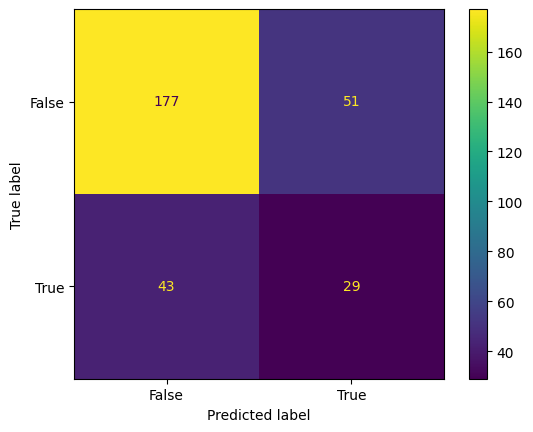

Accuracy: 0.6866666666666666, Precision: 0.3625, Recall: 0.4027777777777778


In [6]:
### Code - the kNN classifier

#Let's create a KNN classifier
knn = KNeighborsClassifier(n_neighbors = 3)

#Let's modify our target variable to for knn. If this is not done, the code throws a warning.
train_label = np.ravel(train[labels])
test_label = np.ravel(test[labels])

#Then, let's fit the classifier to the data
knn.fit(train_stand[features],train_label)

#I used https://www.w3schools.com/python/python_ml_confusion_matrix.asp guidance on Confusion Matrixes below
#Before printing out the confusion matrix we need to predict.
prediction = knn.predict(test_stand[features])

#Now we can create the confusion matrix.
c_matrix = metrics.confusion_matrix(test_label, prediction)

#Let's display it using the metrics library
c_matrix_display = metrics.ConfusionMatrixDisplay(confusion_matrix = c_matrix, display_labels = [False, True])
c_matrix_display.plot()
plt.show()

#Then, we compute the accuracy, precision and recall.
acc = metrics.accuracy_score(test[labels], prediction)

precision = metrics.precision_score(test[labels], prediction)

recall = metrics.recall_score(test[labels], prediction)

print(f"Accuracy: {acc}, Precision: {precision}, Recall: {recall}")

<font color = lightcoral> The top left cell is the false negative cell. In our context, it means that there is both no cardiovasc. disease nor the model predicted one. The top right cell is the false positive, in this context there is no cardiovascular disease but our model predicted one. The bottom left is the true negative, in this context there is a cardiovascular disease but our model didn't predict it. The last one, bottom right cell, is the true positive. In this context, there is a cardiovascular disease and our model also predicted it.</font> 

<font color = lightcoral> The model was accurate at predicting the false negative. It didn't predict the disease well at all, since it missed most of them. I think our k might have an effect on these results. Trying out different K's might produce better and more precise results. </font>

<font color = lightcoral> In our dataset, cardiovascular disease is not very common, so if our model just guesses constantly no, it is most of the time right. As we could see, it was somewhat accurate, but not precise. </font>

---------------

You randomly divided the data into two sets, one for training the k-NN model and the other for evaluating its performance. However, randomness is not the thing we really need, and in fact, it's not something we even desire. Instead, what we do want is to keep track of each step we're making and exporing. This said, the *reproducibility* of the results is extremely important in research. To achieve this, we can utilize <font color = lightcoral> a random seed</font>, with which we can re-run the codes and get the exact same results than before.

For example, we can use a fixed seed when we're shuffling the data before splitting it into training and test sets. This ensures that when we're re-runing the code, we obtain exactly the same partitions of the data in each split.

**Exercise 1 E)**

Initialize 1000 random seeds and continue with the k-NN model ($k=3$): Perform 1000 different train-test splits using these seeds and store the accuracies from each split. Plot the accuracies in a histogram, and discuss your results.

*Tip: You can add the accuracy from the previous exercise in the plot by drawing a vertical line with the function `matplotlib.axes.Axes.axvline(<accuracy>)` if you want!*

In [7]:
### Code - Initialization of the 1000 fixed seeds

#Let's initialize 1000 random seeds.
seeds = np.random.randint(1, 1000, size=1000)

In [ ]:
### Code - 1000 different train-test-splits

#Let's perform 1000 different train-test splits with our random seeds.

#We'll store the accuracies in an array.
accs = []

for seed in seeds:
    
    #The 80/20 split
    train, test = train_test_split(sampled_data, test_size=0.2, random_state = seed)
    
    #Let's modify our target variable to for knn. If this is not done, the code throws a warning.
    train_label = np.ravel(train[labels])
    test_label = np.ravel(test[labels])
    
    #Initializing model
    knn = KNeighborsClassifier(n_neighbors = 3)
    
    #Fitting our data
    knn.fit(train[features], train_label)
    
    #Calculating accuracy
    acc = knn.score(test[features],test_label)
    
    #Recording our accuracy
    accs.append(acc)
    
#Plotting our accuracies
plt.figure(figsize=(10, 5))
plt.hist(accs, bins=30)
plt.xlabel("Accuracy")
plt.ylabel("Frequency")
plt.show()

<font color = lightcoral> The first time our accuracy was about 0.71. From these results we can see, that the accuracies seem to form somewhat of a normality distribution -like histogram with 0.71 being somewhat in the center. We can conclude that with k=3 our model 71% accurate most of the time.</font>

------

One really common evaluation metric is <font color = lightcoral>the area under the receiver operating characteristic (AUROC, AUC or AUC-ROC)</font>.  It provides a measure of a model's ability to distinguish between classes, especially in binary classification tasks between the <i>positive class</i> and the <i>negative class</i>. (There sure are multiclass and multilabel cases too, but they are out of scope here.) 

In our case, individuals who have a CVD form the positive class. As the name of the measure suggests, it combines two keys aspects to interpret a model's performance: ROC curves are about the trade-off between the true positive rate and the false positive rate, the former representing the model's ability to correctly identify individuals with a CVD (true positives) and the latter measuring the model's tendency to incorrectly classify individuals without a CVD as if they have the disease (false positives). Thus, the area beneath the curve is simply the AUROC, a single numerical value, that summarizes the overall performance.

**Exercise 1 F)** 

Evaluate the performance of the trained k-NN model by computing the AUROC and plotting the related curve. Draw also the line for random guesses.

- How well does the k-NN model perform in distinguishing between healthy individuals and those with a CVD?

*Tip: You should not use the predicted labels in this exercise.*

In [ ]:
### Code - ROC curve and AUROC

#I'll reuse some code from earlier to save some time here. 
#Let's create a KNN classifier
knn = KNeighborsClassifier(n_neighbors = 3)

#Let's modify our target variable to for knn. If this is not done, the code throws a warning.
train_label = np.ravel(train[labels])
test_label = np.ravel(test[labels])

#Then, let's fit the classifier to the data
knn.fit(train_stand[features],train_label)

#Now let's get predicted probabilities: (I used https://www.analyticsvidhya.com/blog/2020/06/auc-roc-curve-machine-learning/ for help here)
prob = knn.predict_proba(test_stand[features])[:,1]

#Roc curve
fpr, tpr, thresh = metrics.roc_curve(test_label, prob, pos_label=1)

#AUC
auroc = metrics.auc(fpr, tpr)
print(auroc)

#Let's plot the ROC curve 
plt.figure(figsize=(10,5))
plt.plot(fpr, tpr, color='blue')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

<font color = lightcoral> This kNN model is not very good at distinguishing between healthy inviduals and those with CVD. You could as well as guess and get about the same result.</font>

__________
## <font color = royalblue> 2. Classification accuracy using leave-one-out cross-validation

While the train-test split may provide us with an unbiased estimate of the performance, we only evaluate the model once. Especially when dealing with small datasets, a test set itself will be very small. How can we be sure that the evaluation is accurate with this small test set and not just a good (or bad) luck? And what if we'd like to compare two models and the other seems to be better -- how can we be sure that it's not just a coincidence?

Well, there's a great help available and it's called <font color = royalblue>cross-validation</font>. With its help, we can split the dataset into multiple different training and test sets, which allows us to evaluate models across various data partitions. This time, we'll take a closer look at the <font color = royalblue>leave-one-out cross-validation</font>.

**Exercise 2**

Let's keep the focus on detecting the CVD, so once again we utilize the k-NN model (with $k=3$) to predict the precense of the disease. Now, apply leave-one-out cross-validation to assess whether the k-NN model is suitable for addressing the problem. You may use the entire dataset on this task.

- What can you say about the accuracy compared to the previous task?
- What do you think: Does the k-NN model work for the problem in hand? Explain your answer.

*Tip: This sure can be done manually, but `cross_val_score` is quite a handy function too.*

In [ ]:
### Code - Leave-one-out cross-validation

#Let's create a KNN classifier. I used https://machinelearningmastery.com/loocv-for-evaluating-machine-learning-algorithms/ for help in this part.
knn = KNeighborsClassifier(n_neighbors = 3)

#Let's modify our target variable to for knn. If this is not done, the code throws a warning.
label = np.ravel(sampled_data[labels])

#Let's use the cross_val_score function here. The least populated class here has 457 members so let's perform on that many subsets.
accs = cross_val_score(knn, sampled_data[features], label, cv=457)

#Let's then calculate the mean from the accs
mean = np.mean(accs)
print(mean)

<font color = royalblue> The accuracy seems to be quite equal to the 0.71 we had earlier. I think our k-NN model was quite bad at identifying people with CVD so I'd use some other model for this.</font>

____________
## <font color = forestgreen> 3. Model selection with leave-one-out cross-validation

So far, we've trained one model at a time and I've given the value of k for you. Accuracy is what it is (no spoilers here), but could we still do a little better? Let's explore that possibility through a process known as <font color=green>hyperparameter tuning</font>. The cross-validation is especially important tool for this task. Note here, that model selection and model evaluation (or assessment) are two different things: We use model selection to estimate the performance of various models to identify the model which is most likely to provide the "best" predictive performance for the task. And when we have found this most suitable model, we *assess* its perfomance and generalisation power on unseen data.

This time, we're going to train multiple models, let's say 30, and our goal is to select the best K-Nearest Neighbors model from this set. Most models come with various hyperparameters that require careful selection, and the k-NN model is no exception. Although we're talking about the number of neighbors here, it's important to note that k-NN also has several other hyperparameters. However, for the sake of simplicity, this time we'll focus solely on fine-tuning the number of nearest neighbors, that is, the value of k. 

Let's focus on the model selection part here for the sake of comprehending the cross-validation itself. We'll get later on the whole pipeline, which also includes model assessment.

**Exercise 3**

Find the optimal k value from a set of $k=1...30$ using leave-one-out cross-validation. Plot the accuracies vs. the k values. Again, you may use the entire dataset.

- Which value of k produces the best accuracy when using leave-one-out cross-validation? Compare the result to the previous model with $k=3$.
- If the number of k is still increased, what is the limit that the accuracy approaches? Why?
- Discuss the impact of choosing a very small or very large number of neighbors on the k-NN model's ability to distinguish between the healthy individuals and the ones with CVD.

In [ ]:
### Code - Select best model

#Let's modify our target variable to for knn. If this is not done, the code throws a warning.
label = np.ravel(sampled_data[labels])

#Let's establish the range for our k values. I used https://machinelearningmastery.com/how-to-configure-k-fold-cross-validation/ for help here.
k_values = range(1,31)

#Now let's perform LOOCV for every k value and record their accuracies.
accs = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, sampled_data[features], label, cv=5) #As we know from last task, the least populated class has 457 members but let's use a lower value so the runtime wont be abysmal.
    accs.append(np.mean(scores))

#Let's select the best model by finding the largest accuracy.
best_model = k_values[np.argmax(accs)]
print(best_model)

In [ ]:
### Code - Plot the accuracies vs. the values for k

plt.figure(figsize=(10, 6))
plt.plot(k_values, accs, marker='o', linestyle='-')
plt.title('Accuracy vs. Number of Neighbors (k)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Mean Accuracy')
plt.xticks(k_values)
plt.show()

<font color = green> k=29 gives us the best result. Its accuracy is over 0.76 compared to the 0.72 of k=3. Should the k be further increased, the accuracy seems to stay somewhere within 0.76. The model already takes into account all of the relevant information and further increasing the k makes it more biased and causes underfitting. If the k is too small, the model is too sensitive for noise in the data which lowers its accuracy significantly. </font>

________________
## <font color = red>  4. Training and testing on the same dataset </font>

<i>Note that this should never be done outside of this exercise! You have been warned.</i>

Oh, but what if we just trained a model using the *entire* dataset? Wouldn't we like to use as much data as possible to discover the underlying patterns in the data so why not to use all of it?

**Exercise 4**

This is quite straightforward: Train 30 k-NN models ($k = 1...30$ ) using the whole dataset and evaluate the trained models using, again, the whole dataset. Create a plot that displays the accuracies against the corresponding k values. Include the accuracy values from the previous task in the same figure.

- What's the optimal value for k now and why's that? How would you interpret the reliability of the predictions?
- Explain why you should never use the same dataset for training and testing.

In [ ]:
### Code - Train with whole data
#Let's modify our target variable to for knn. If this is not done, the code throws a warning.
label2 = np.ravel(cardio_data[labels])

#Let's establish the range for our k values. I used https://machinelearningmastery.com/how-to-configure-k-fold-cross-validation/ for help here.
k_values2 = range(1,31)

#Now let's perform LOOCV for every k value and record their accuracies.
accs2 = []
for k in k_values2:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores2 = cross_val_score(knn, cardio_data[features], label2, cv=5) #As we know from last task, the least populated class has 457 members
    accs2.append(np.mean(scores2))

In [ ]:
### Code - Plot results
plt.figure(figsize=(10, 6))
plt.plot(k_values, accs, color='blue', marker='o', linestyle='-')
plt.plot(k_values2, accs2, color='red', marker='x', linestyle='--')
plt.title('Accuracy vs. Number of Neighbors (k)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Mean Accuracy')
plt.xticks(k_values)
plt.show()

<font color = red> There seems to be a mistake in the plotting or I've understood the assignment from in some form. By using the entire dataset the model is now more accurate. But it only works for this data since if you use the entire dataset for training, the model will overfit and performs poorly if some new unseen data is given to it. </font>

_____________________

## <font color = darkorange> 5. Comparison of ridge regression and k-NN regression </font>

The previous exercises were about classification. Now, we are ready to see another kind of supervised learning - regression - as we are changing our main goal from predicting discrete classes (healty/sick) to estimating continuous values. The following exercises are going to involve utilizing two different regression models, <font color = darkorange>Ridge Regression</font> and <font color = darkorange>K-Nearest Neighbors (k-NN) Regression</font>, and our goal is to evaluate and compare the performances of these two models. 

Let's change the dataset to make the following exercises more intuitive. The new dataset is about brushtail possums and it includes variables such as

- <b>sex</b>: Gender, either male (0) or female (1)
- <b>age</b>: Age in years
- <b>len_head</b>: Head length in cm
- <b>width_skull</b>: Skull width in mm
- <b>len_total</b>: Total length in cm
- <b>len_tail</b>: Tail length in cm
- <b>len_foot</b>: Foot length 
- <b>len_earconch</b>: Ear conch length 
- <b>width_eye</b>: Distance from medial canthus to lateral canthus of right eye, i.e., eye width
- <b>chest</b>: Chest grit in cm
- <b>belly</b>: Belly grit in cm

In this case, our target variable will be *the age of the possum*. The data for this exercise has been modified from the original source.

There's the code chunk for loading data provided again. <font color = red>Again, the data file should be located in the same directory as this notebook file!</font>

In [ ]:
### Loading code provided
# ------------------------------------------------------
# The data file should be at the same location than the 
# exercise file to make sure the following lines work!
# Otherwise, fix the path.
# ------------------------------------------------------

# Data path
data_path = 'ex2_possum_data.csv'

# Load the data 
possum_data = pd.read_csv(data_path)

-----------

Regression allows us to examine <font color = darkorange>relationships between two or more variables</font>. This relationship is represented by an *equation*, which itself represents how a change in one variable affects another on average. For example, we could examine how a change in possum's total length affects, on average, its estimated age.

We start by examing those relationships between the variables in the given dataset.


**Exercise 5 A)**

Plot pairwise relationships between the age variable and the others where you color the samples based on the sex variable. 

- Which body dimensions seem to be most correlated with age? And are there any variables that seem to have no correlation with it?
- Are there any differences in the correlations between males and females?

*Tip: `seaborn.pairplot()` is handy with the parameters `(x,y)_vars` and `hue`. You actually can fit a linear model to draw a regression line with the parameter `kind` set to `"reg"`.*

In [ ]:
### Code - Pairplot

#Let's plot pairwise relationships between age variable. I used https://www.geeksforgeeks.org/python-seaborn-pairplot-method/ as help here.
sns.pairplot(possum_data, hue='sex', vars=['age', 'len_head', 'width_skull', 'len_total', 'len_tail', 'len_foot', 'len_earconch', 'width_eye', 'chest', 'belly'])
plt.show()

<font color = darkorange> Head length, tail length, total length, eye width, chest and belly seem to steadily grow and shrink with age. Males have generally larger chests, bellies, eye widths, feet and tails. Females have slightly larger heads at some point in their lives and in some aspects might outgrow males.

------

Before the regression analysis itself, let's check that our dataset is in a proper format. We'll also perform the train-test split as we're going to first tune the hyperparameters for each model using the training set and test the overall performance of the chosen models using the test set.

**Exercise 5 B)**

Do you need to prepare the data a little? Explain your decision. Perform the train-test (80/20) split. 

In [ ]:
### Code - Data preparation

#Let's check for missing values.
print(possum_data.isnull().sum())

#Let's collect features and separate the target variable, age. First let's separate them.

labels = ['age']

features = ['sex', 'len_head', 'width_skull', 'len_total', 'len_tail', 'len_foot', 'len_earconch', 'width_eye', 'chest', 'belly']

#Let's then split the data into training and test set.
train, test = train_test_split(possum_data, test_size=0.2)



<font color = darkorange>\<Write your answer here\></font>

------

Regarding the k-NN, we have already get familiar with the optimization of the k value. The idea behind the k-NN is the same as previously in classification, the output isn't a class anymore but a continuous value. So, for now, we can stick to the optimal k value. However, for Ridge Regression, we'll focus on the hyperparameter called $\lambda$ (read as 'lambda'), the regularization term (or penalty term or L2 penalty, how ever we'd like to call it), and try to find its optimal value for this task. After the model selection for both regression is performed, we compare the chosen models using a metric called <font color = darkorange>mean absolute error (MAE)</font>.

**Exercise 5 C)**

Train multiple ridge regression models and k-NN regression models. For hyperparameters, use $\lambda=2^{-10}...2^{10}$ and $k=1...30$. Once again, use leave-one-out cross validation. Remember to use only the training dataset for model selection. Plot the optimal k values and lambdas versus corresponding MAEs (two different plots).

- Introduce the optimal hyperparameters for each regression model.
- How do you interpret the MAE in our case when the target variable is age?

*Note: In a `sklearn.linear_model.Ridge` class, lambda is called as "alpha" so don't get confused.*

In [ ]:
### Code - CV for Ridge regression and k-NN regression

# I used https://machinelearningmastery.com/ridge-regression-with-python/ and https://www.geeksforgeeks.org/how-to-calculate-mean-absolute-error-in-python/ for help here.

#Let's initialize variables for storing optimal values and MAEs
opt_ks = []
opt_lambdas = []
mae_knn = []
mae_ridge = []

#Let's introduce our hyperparameters.
k_values = range(1,31)
lambda_values = [2**x for x in range(-10, 11)]

#Let's modify our target variable to for knn. If this is not done, the code throws a warning.
label = np.ravel(train[labels])

#LOOCV for Ridge Recession
for l in lambda_values:
    ridge = Ridge(alpha=l)
    mridge = -cross_val_score(ridge, train[features], label, cv=5, scoring='neg_mean_absolute_error').mean()
    mae_ridge.append(mridge)
    
#LOOCV for kNN recession
for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    mknm = -cross_val_score(knn, train[features], label, cv=5, scoring='neg_mean_absolute_error').mean()
    mae_knn.append(mknm)

#Let's find best lambda value for Ridge
best_lambda = lambda_values[np.argmin(mae_ridge)]
opt_lambdas.append(best_lambda)
    
#Let's find best k value for k-NN
best_k = k_values[np.argmin(mae_knn)]
opt_ks.append(best_k)

#Let's create a plot for the kNN.
plt.figure(figsize=(10, 5))
plt.plot(k_values, mae_knn, marker='o', linestyle='-')
plt.xlabel('k values')
plt.ylabel('Mean Absolute Error')
plt.title('Optimal k values vs. Mean Absolute Error (k-NN)')
plt.axvline(x=best_k, color='red', linestyle='--')
plt.show()

#Let's the create another plot for Ridge
plt.figure(figsize=(10, 5))
plt.plot(lambda_values, mae_ridge, marker='o', linestyle='-')
plt.xlabel('Lambda values')
plt.ylabel('Mean Absolute Error')
plt.title('Optimal Lambda values vs. Mean Absolute Error (Ridge Regression)')
plt.axvline(x=best_lambda, color='red', linestyle='--')
plt.show()

print(f"Our best k value according to MAE is {opt_ks} and best lambda value is {opt_lambdas}")

<font color = darkorange> According to MAE, our most optimal k value for k-NN recession is k=14 and most optimal lambda value for Ridge Recession is lambda = 128. The MAE in this dataset represents the average by which predicted ages deviate from the actual ages.</font>

------

The cross-validation was employed for model selection and at this point, we have the optimal hyperparameter settings for each model. Let's finally assess both models using the test set. To continue from this, we first fit the chosen models using the entire training, ensuring that the models are trained with the maximum available data. 

**Exercise 5 D)**

Fit the chosen models with the whole training set. Evaluate the models using the test set and describe the results.

- How well did the models perform in estimating the possums' ages?
- So, what's the pitfall in here if you had compared the overall performance of the models based on the cross-validation MAEs and not the MAEs for the test set?

In [ ]:
## Code - Evaluating the selected models

#We know know the optimal k and lambdas values and can now estimate the possum ages.

#Let's also transform our test labels. If this is not done it causes a warning.
test_label = np.ravel(test[labels])

#Let's first utilize Ridge Recession. Start with initializing it and then fit our training data.
ridge = Ridge(alpha=best_lambda)
ridge.fit(train[features], label)

#Then, we'll make some predictions and evaluate using the MAE.
ridge_pred = ridge.predict(test[features])
mae_ridge = metrics.mean_absolute_error(test_label, ridge_pred)

#Then, let's utilize kNN recession. Start with initializing it and then fit our training data.
knn = KNeighborsRegressor(n_neighbors = best_k)
knn.fit(train[features], label)

#Then, we'll make some predictions and evaluate using the MAE.
knn_pred = knn.predict(test[features])
mae_knn = metrics.mean_absolute_error(test_label, knn_pred)

#Let's print our findings
print(f"Fitting our models with training data shows us that kNN regression gave us a MAE value of {mae_knn:.3f} and Ridge Recession gave us a MAE value of {mae_ridge:.3f}")


<font color = darkorange> The Rdige model performed slightly better than the kNN model. If we hadn't utilized the test set, the model would have become too accustomed to the training data and some overfitting would have happened. The model would have produced some incorrect results in datasets it has not yet seen if it had some good luck in predicting learning patterns only found in the training dataset. </font>